In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.utils import shuffle
from sklearn import linear_model

C:\Anaconda3\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.
C:\Anaconda3\envs\tensorflow-sessions\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


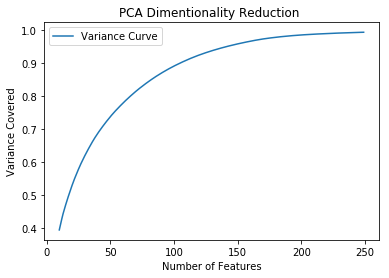

In [2]:
#PCA - (Principle Component Analysis)
#Uygulama
trainX = pd.read_table('./X_train.txt', delim_whitespace=True,header=None)
trainy = pd.read_table('./y_train.txt',delim_whitespace=True,header=None)
testX = pd.read_csv("./X_test.txt",delim_whitespace=True,header=None)
testy = pd.read_csv('./y_test.txt',delim_whitespace=True,header=None)
one = [trainX,testX]
two = [trainy,testy]
X_df = pd.concat(one)
y_df = pd.concat(two)

# PCA için yardımcı fonksiyonlar
def fetaure_norm(X):
    mu = X.mean(axis=0)
    stdv = X.std(axis = 0)

    X_norm = (X - mu)/stdv
    return X_norm

def pca(X):
    m,n = X.shape
    
    sigma = (1/m) * X.T * X
    a, b = np.linalg.eig(sigma)
    
    sort = a.argsort()[::-1]
    eigVal = a[sort]
    eigVec = b[:,sort]
    
    return eigVal,eigVec

def reduced_data(X, U, k):
    U_reduce = U[:,:k]
    Z = U_reduce.T * X.T
    return Z

def recover_data(Z,U,K):
    X_rec = Z.T * U[:,:k].T
    return X_rec

def variance_cal(S,k,m):
    total1 = 0
    total2 = 0
    for i in range(1,k):
        total1 = total1 + S[i]
    
    for j in range(1,m):
        total2 = total2 + S[j]
        
    variance = total1/total2
    return variance


X = np.asmatrix(X_df)
y = np.asmatrix(y_df)

X_norm = fetaure_norm(X)
m,n = X_norm.shape
a,b = pca(X_norm)
tes = np.array([])
li = list(range(10,250))
for k in li:
    Z = reduced_data(X_norm,b,k)
    X_recov = recover_data(Z,b,k)
    test1 = variance_cal(a,k,n)
    tes = np.append(tes,test1)

plt.plot(li,tes, label = 'Variance Curve')
plt.title('PCA Dimentionality Reduction ')
plt.ylabel('Variance Covered')
plt.xlabel('Number of Features')
plt.legend()
plt.show()